In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('C:\\Users\\Shree\\OneDrive\\Desktop\\DWDA\\MINI_PROJECT_DS.csv')
print(df.head())


   CASE_NO_PATIENT'S  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  \
0                  1   0   0   0   0   0   0   1   1   0  ...   
1                  2   1   1   0   0   0   1   1   0   0  ...   
2                  3   1   0   0   0   0   0   1   1   0  ...   
3                  4   1   1   1   1   1   1   1   1   1  ...   
4                  5   1   1   0   1   1   1   1   1   1  ...   

   Global developmental delay/intellectual disability  \
0                                                Yes    
1                                                Yes    
2                                                Yes    
3                                                Yes    
4                                                Yes    

  Social/Behavioural Issues  Childhood Autism Rating Scale  Anxiety_disorder  \
0                       Yes                              1               Yes   
1                       Yes                              2               Yes   
2                       Ye

In [5]:
df.shape


(1985, 28)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO_PATIENT'S                                   1985 non-null   int64  
 1   A1                                                  1985 non-null   int64  
 2   A2                                                  1985 non-null   int64  
 3   A3                                                  1985 non-null   int64  
 4   A4                                                  1985 non-null   int64  
 5   A5                                                  1985 non-null   int64  
 6   A6                                                  1985 non-null   int64  
 7   A7                                                  1985 non-null   int64  
 8   A8                                                  1985 non-null   int64  
 9

In [13]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
CASE_NO_PATIENT'S,1985.0,993.000000,573.164462,1.0,497.0,993.0,1489.0,1985.0
A1,1985.0,0.299244,0.458042,0.0,0.0,0.0,1.0,1.0
A2,1985.0,0.238287,0.426143,0.0,0.0,0.0,0.0,1.0
A3,1985.0,0.213098,0.409600,0.0,0.0,0.0,0.0,1.0
A4,1985.0,0.272040,0.445123,0.0,0.0,0.0,1.0,1.0
A5,1985.0,0.278589,0.448418,0.0,0.0,0.0,1.0,1.0
A6,1985.0,0.306297,0.461071,0.0,0.0,0.0,1.0,1.0
A7,1985.0,0.345088,0.475517,0.0,0.0,0.0,1.0,1.0
A8,1985.0,0.243829,0.429499,0.0,0.0,0.0,0.0,1.0
A9,1985.0,0.259950,0.438717,0.0,0.0,0.0,1.0,1.0


In [15]:
df['Ethnicity'].value_counts()


Ethnicity
White European    549
Asian             392
Middle Eastern    362
asian             213
south asian       206
South Asian        49
Black              45
middle eastern     41
Hispanic           40
Others             35
Latino             26
black               8
PaciFica            8
Mixed               7
Native Indian       3
mixed               1
Name: count, dtype: int64

In [17]:
df['Who_completed_the_test'].value_counts()

Who_completed_the_test
Health Care Professional    1233
Family Member                658
Family member                 58
School and NGO                29
Self                           4
Others                         3
Name: count, dtype: int64

In [19]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})

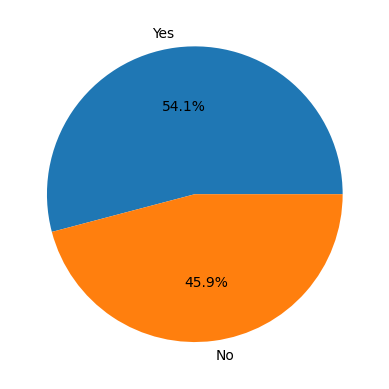

In [21]:
plt.pie(df['ASD_traits'].value_counts().values, labels=df['ASD_traits'].value_counts().index, autopct='%1.1f%%')
plt.show()


In [23]:
ints = []
objects = []
floats = []

for col in df.columns:
    if df[col].dtype == np.int64:
        ints.append(col)
    elif df[col].dtype == object:
        objects.append(col)
    elif df[col].dtype == np.float64:
        floats.append(col)

if "CASE_NO_PATIENT'S" in ints:
    ints.remove("CASE_NO_PATIENT'S")

if 'ASD_traits' in objects:
    objects.remove('ASD_traits')
    
print("Ints:", ints)
print("Objects:", objects)
print("Floats:", floats)


Ints: ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10_Autism_Spectrum_Quotient', 'Age_Years', 'Childhood Autism Rating Scale']
Objects: ['Social_Responsiveness_Scale', 'Speech Delay/Language Disorder', 'Learning disorder', 'Genetic_Disorders', 'Depression', 'Global developmental delay/intellectual disability', 'Social/Behavioural Issues', 'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who_completed_the_test']
Floats: ['Qchat_10_Score']


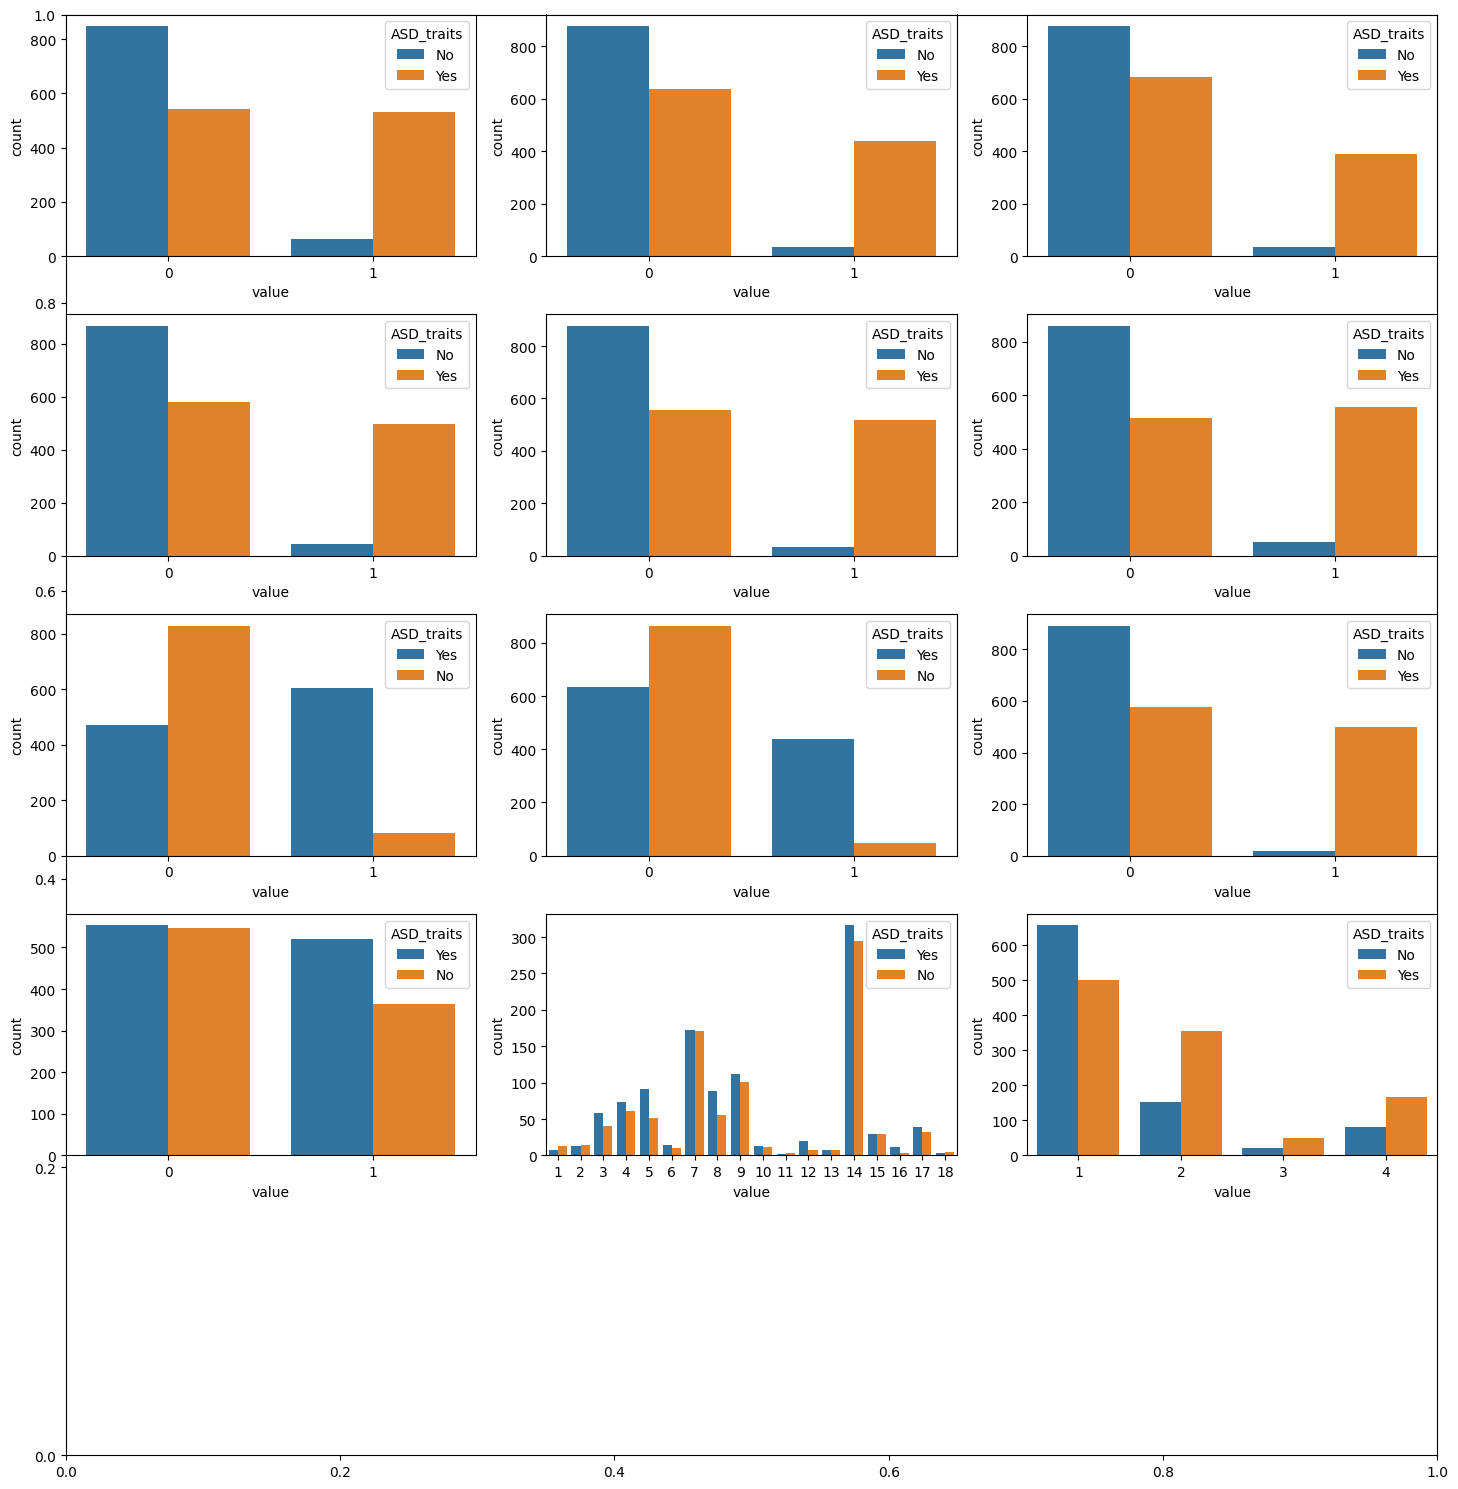

In [25]:
# Convert the data to long-form using melt
df_melted = df.melt(id_vars=["CASE_NO_PATIENT'S", 'ASD_traits'], value_vars=ints, var_name='col', value_name='value')

plt.subplots(figsize=(15,15))

for i, col in enumerate(ints):
  plt.subplot(5,3,i+1)
  # Use the melted DataFrame and specify x and hue
  sb.countplot(x='value', hue='ASD_traits', data=df_melted[df_melted['col'] == col]) 

plt.tight_layout()
plt.show()


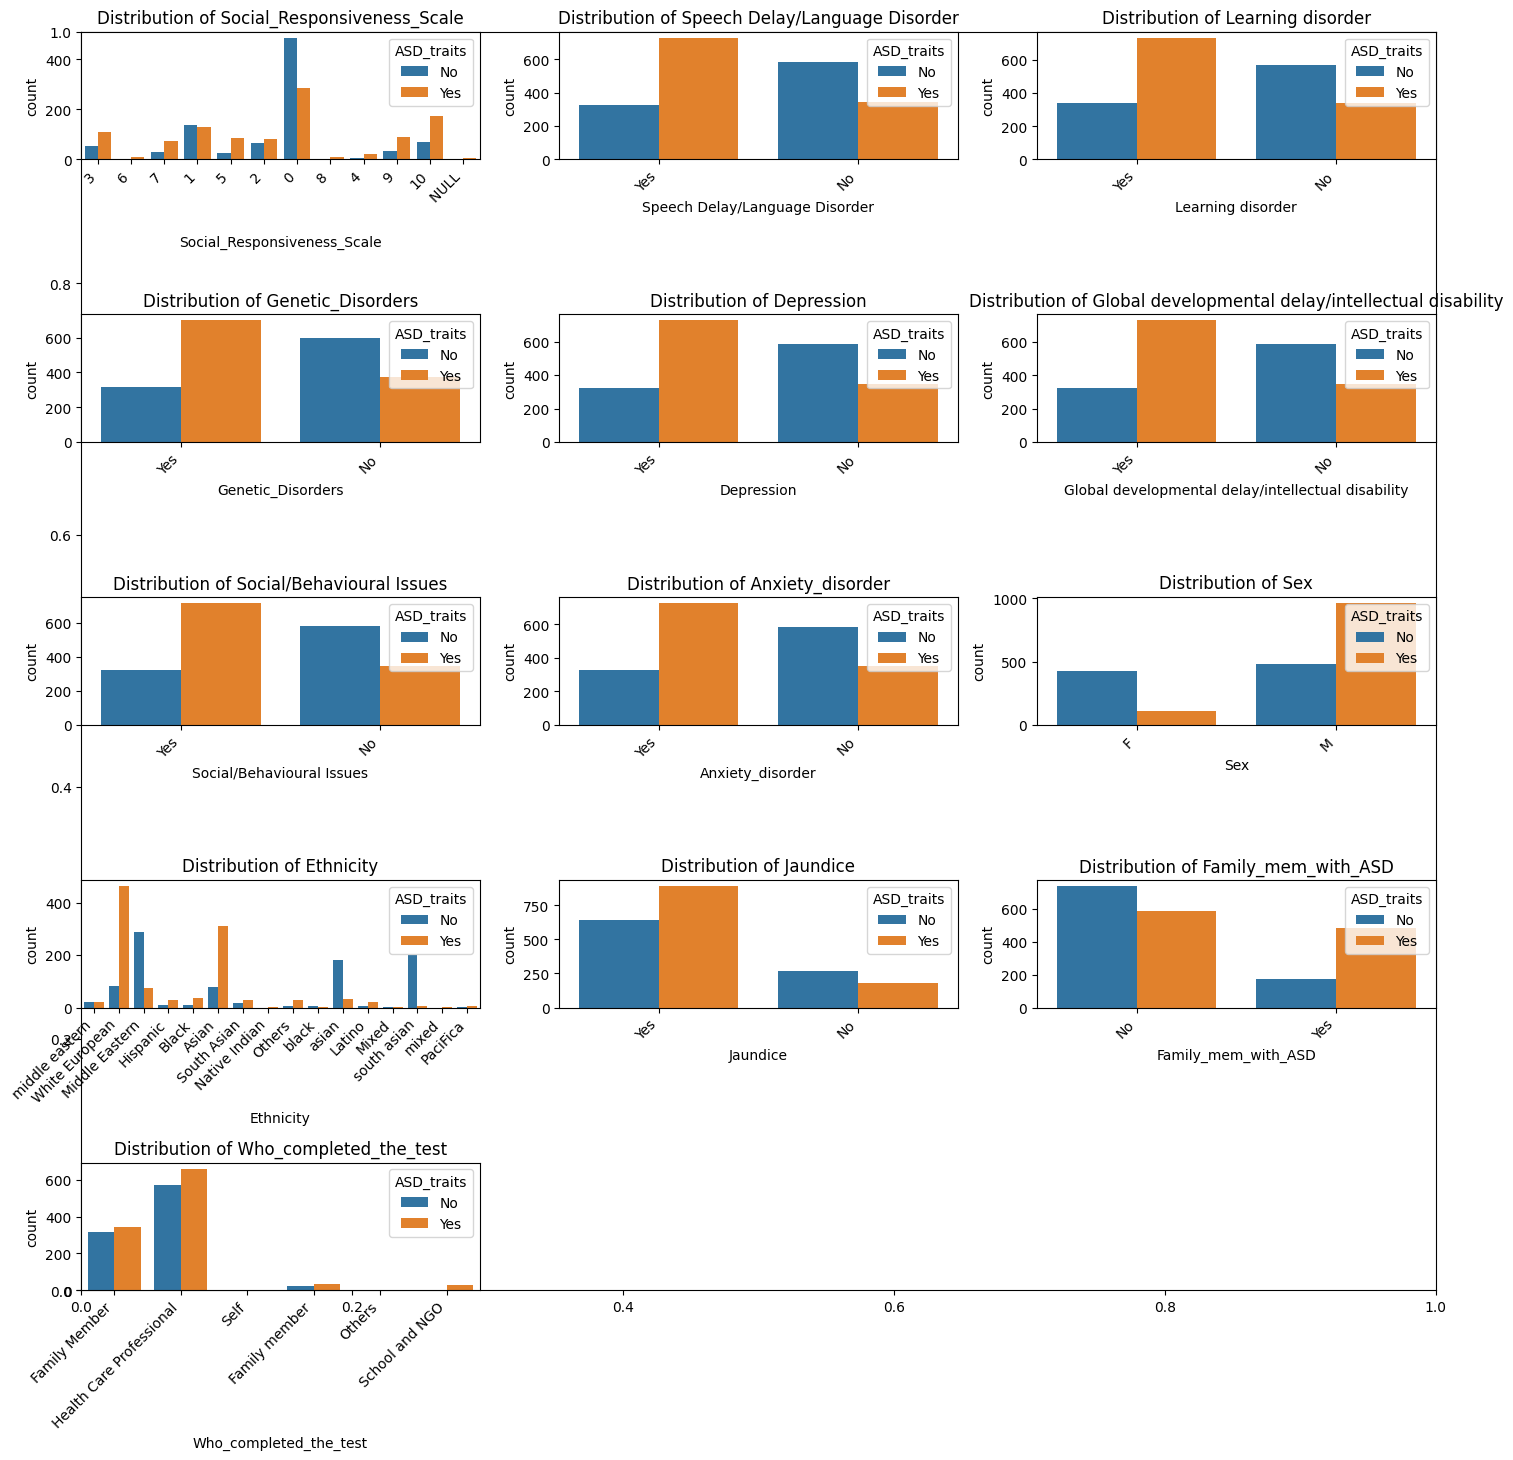

In [27]:
plt.subplots(figsize=(15, 15))  # Adjust figure size as needed

for i, col in enumerate(objects):
    plt.subplot(5, 3, i + 1)  # Adjust subplot grid as needed
    sb.countplot(x=col, hue='ASD_traits', data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right') # Rotates x-axis labels for better readability

plt.tight_layout()
plt.show()


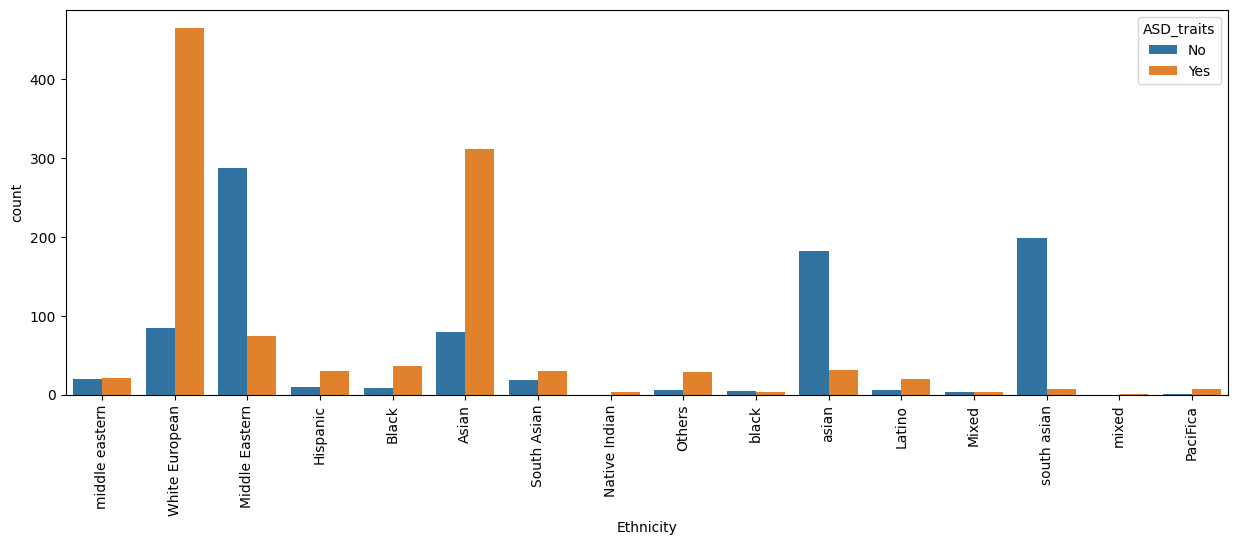

In [31]:
plt.figure(figsize=(15,5))
sb.countplot(data=df, x='Ethnicity', hue='ASD_traits')
plt.xticks(rotation=90)
plt.show()


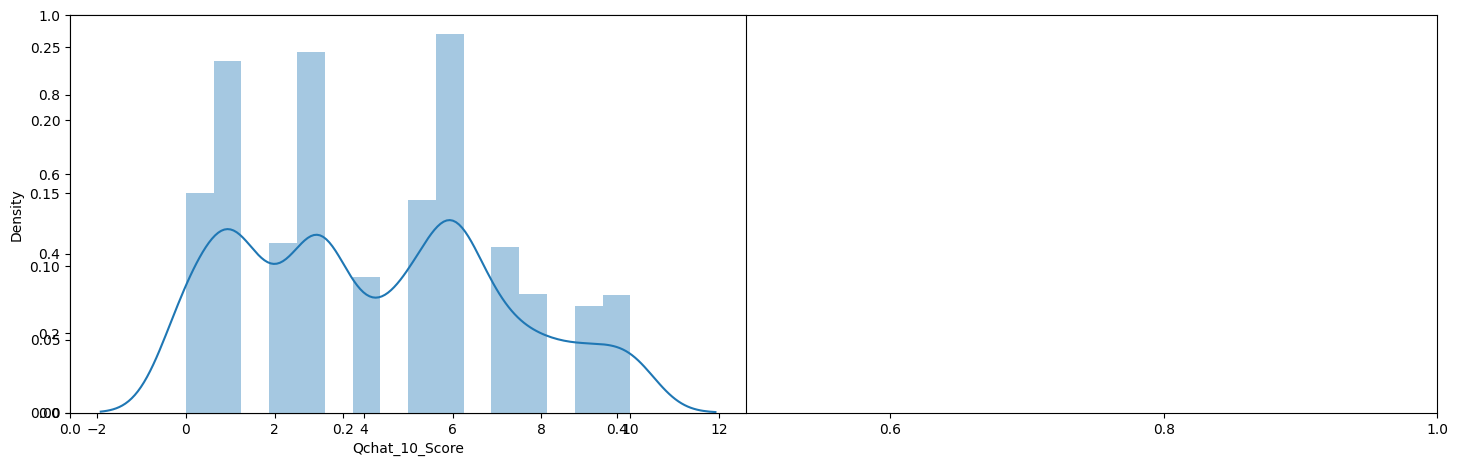

In [33]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()


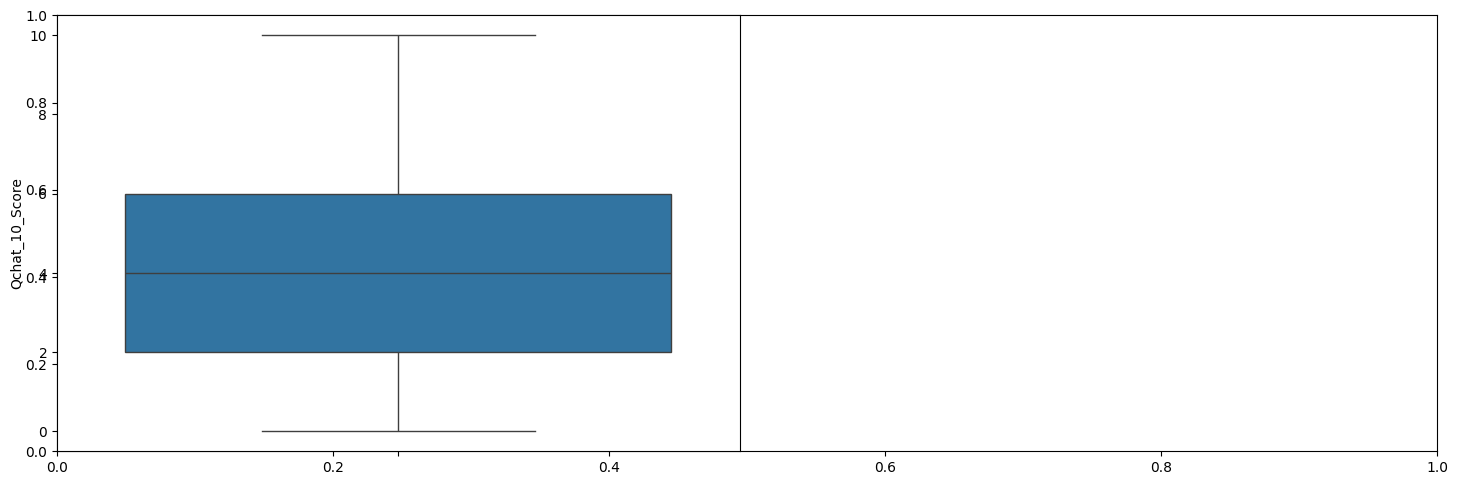

In [35]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()


In [43]:
df = df[df['Qchat_10_Score'] > 5]   
df.shape

(739, 28)

In [47]:
def convertAge(age):
    if age < 4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Young'
    else:
        return 'Senior'

df['ageGroup'] = df['Age_Years'].apply(convertAge)


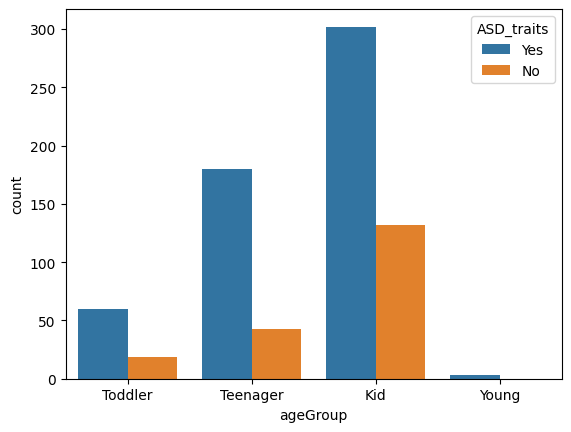

In [49]:
sb.countplot(x=df['ageGroup'], hue=df['ASD_traits'])
plt.show()


In [51]:
def add_feature(data):
    score_columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']
    
    data['sum_score'] = 0
    for col in score_columns:
        data['sum_score'] += data[col]

    data['ind'] = (
        data['Jaundice'].map({'yes': 1, 'no': 0}) +
        data['Family_mem_with_ASD'].map({'yes': 1, 'no': 0})
    )

    return data

df = add_feature(df)


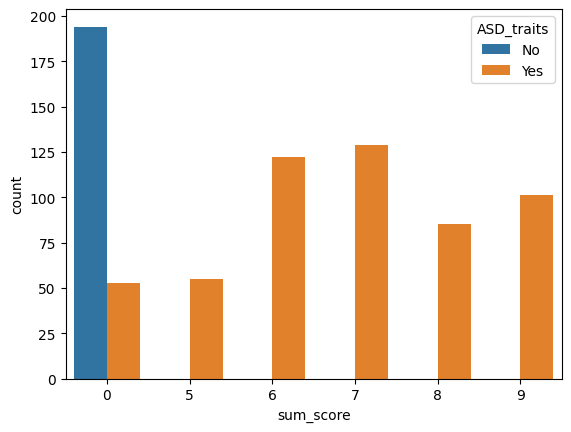

In [53]:
sb.countplot(x=df['sum_score'], hue=df['ASD_traits'])
plt.show()


In [55]:
df['Age_Years'] = df['Age_Years'].apply(lambda x: np.log(x))


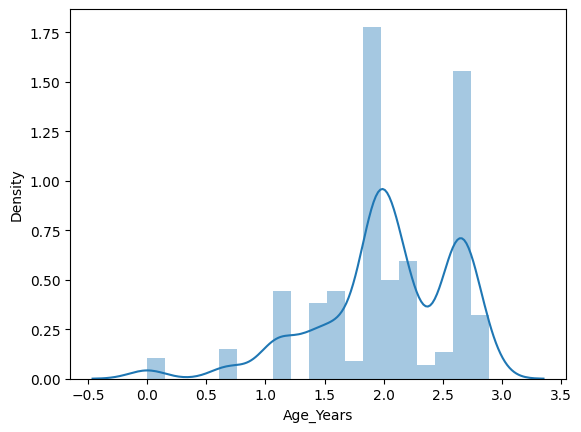

In [57]:
sb.distplot(df['Age_Years'])
plt.show()


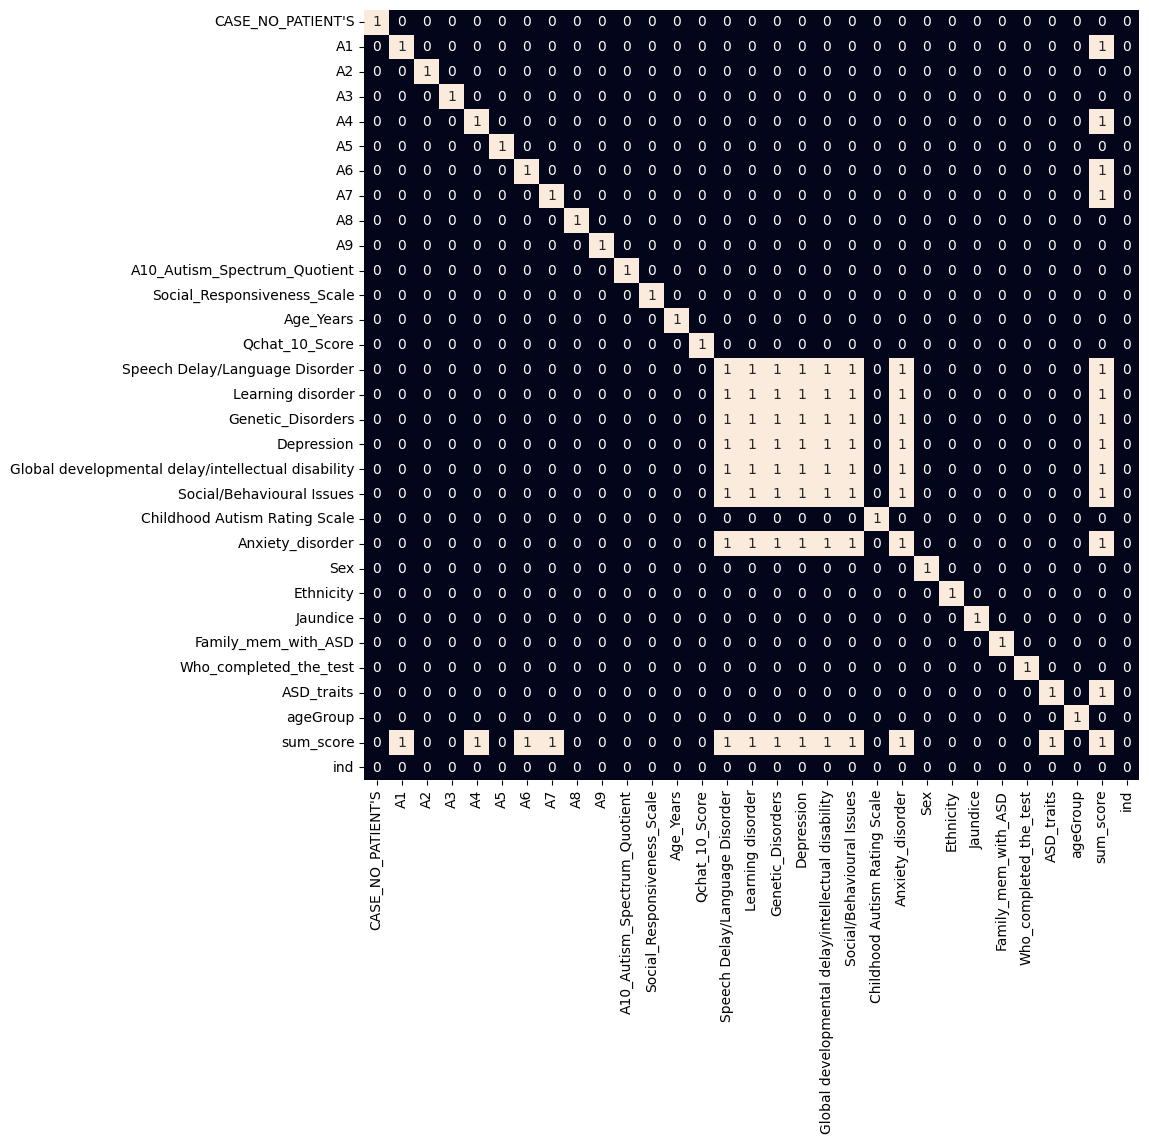

In [61]:
def encode_labels(data):
    for col in data.columns:
      if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    
    return data

df = encode_labels(df)

plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()


In [65]:
removal = ["CASE_NO_PATIENT'S", 'ASD_traits']  # Remove ASD_traits from features, use as target
features = df.drop(removal, axis=1)
target = df['ASD_traits']


In [67]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train)
X.shape, Y.shape


((864, 29), (864,))

In [69]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import numpy as np

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=10)

ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
X, Y = ros.fit_resample(X_train, Y_train)
X = X.fillna(0)
X_val = X_val.fillna(0)
models = [
    LogisticRegression(),
    SVC(kernel='rbf', probability=True),  
    DecisionTreeClassifier()
]
for model in models:
    model.fit(X, Y)

    print(f'{model.__class__.__name__} :')
    print('Training ROC-AUC Score:', roc_auc_score(Y, model.predict_proba(X)[:, 1]))
    print('Validation ROC-AUC Score:', roc_auc_score(Y_val, model.predict_proba(X_val)[:, 1]))
    print()



LogisticRegression :
Training ROC-AUC Score: 1.0
Validation ROC-AUC Score: 1.0

SVC :
Training ROC-AUC Score: 1.0
Validation ROC-AUC Score: 1.0

DecisionTreeClassifier :
Training ROC-AUC Score: 1.0
Validation ROC-AUC Score: 1.0



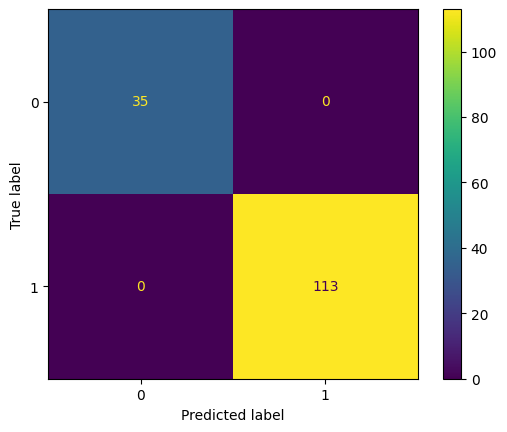

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_val, Y_val)
plt.show()
